#### Figure S18 A,B in M&S (2020) AS&T

This figure illustrates the particle size distribution (PSDs) of the recovered samples that have gone through modal analysis (i.e., decomposition of PSD into smaller log-normal PSDs). The mode Goemetric Mean (GM) and Goemertic Standard Deviation (GSDs) for the log-normal PSDs were kept the same as those of test dust, and only the volume fraction changed for trial and error estimation purposes to fit the actual measured values. Each figure shows one case when there was a good fit and one case when there was a bad fit. Lack of a good fit can indicate loss of particles or agglomeration processes. More information is in the paper.

Plot type: Line plot

In [4]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

# exec(open('notion_corrections.py').read())

df_mes = pd.read_excel(r'artl_v_psd_master.xlsx')
df_modal = pd.read_excel(r'modal_combine_all.xlsx')

# selected samples (by Experiment No.) representing good and bad fit cases
ref_list = ['009', '004', '012', '003']

# reading from measured values
keep_col_mes =  ['Size'] + [col for col in df_mes.columns if (col[5:8] in ref_list) 
                            if (('min' in col) | ('max' in col) | ('mean' in col))
                            if ('hd' in col) | ('td' in col)]
df_mes = df_mes[keep_col_mes]

df_mes.columns = ['Size'] + [col[5:12] + col[30:] for col in df_mes.columns if col[5:8] in ref_list]

# calculating error and merging to the measured dataframe
i = 1
temp = pd.DataFrame([])
for item in ref_list:
    temp = df_mes[['Size'] + [col for col in df_mes.columns if col[0:3] == item]]
    temp.iloc[:,2] = temp.iloc[:,1] - temp.iloc[:,2]
    temp.iloc[:,3] = temp.iloc[:,3] - temp.iloc[:,1]
   
    if i == 1:
        df_mes_err = temp
        i += 1
    else:
        df_mes_err = temp.merge(df_mes_err, on = 'Size', how = 'outer')

       

# reading from estimated modal analysis   
keep_col_modal = ['Size'] + [col for col in df_modal.columns if col[4:7] in ref_list]
df_modal = df_modal[keep_col_modal]


C:\Users\alima\anaconda3\lib\site-packages\pandas\core\indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


In [3]:
df_modal.head()

,Size,fit_003_11e_iso,fit_004_11e_ash,fit_009_11e_ash,fit_012_11e_iso
0,0.100,0.000812,0.000382,0.000172,0.000525
1,0.112,0.001339,0.000630,0.000284,0.000866
2,0.126,0.002215,0.001042,0.000469,0.001433
3,0.141,0.003528,0.001660,0.000747,0.002283
4,0.158,0.005564,0.002619,0.001178,0.003601


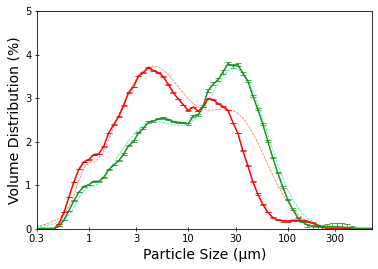

In [6]:
####################
### Figure S18 A ###
####################

plt.figure()
plt.errorbar(df_mes_err.iloc[:,0], df_mes_err.iloc[:,1],
             yerr = [df_mes_err.iloc[:,2], df_mes_err.iloc[:,3]],
             xerr = None,
             capsize = 3, c = "red", ecolor = 'red', elinewidth = 0.75, capthick = 0.75)
    
plt.plot(df_modal.iloc[:,0], df_modal.iloc[:,1],
         linestyle = '--', color = 'tomato', linewidth = 0.7) #(0, (10, 12)) mediumspringgreen

plt.errorbar(df_mes_err.iloc[:,0], df_mes_err.iloc[:,4],
             yerr = [df_mes_err.iloc[:,5], df_mes_err.iloc[:,6]],
             xerr = None,
             capsize = 3, c = "forestgreen", ecolor = 'forestgreen', elinewidth = 0.75, capthick = 0.75)
    
plt.plot(df_modal.iloc[:,0], df_modal.iloc[:,4],
         linestyle = '--', color = 'mediumspringgreen', linewidth = 0.7) #(0, (10, 12)) mediumspringgreen

plt.xscale('log')

plt.xlim(0.3, 700)
a = [0.3, 1, 3, 10, 30, 100, 300]
plt.xticks(ticks = a, labels = a)
plt.minorticks_off()
plt.xlabel('Particle Size (µm)', size = 14)

plt.ylim(0, 5)
plt.yticks(np.arange(0, 6, step=1))
plt.ylabel('Volume Distribution (%)', size = 14)

plt.tick_params(axis = 'both', direction = 'inout')
plt.savefig(r'FigureS18_iso.jpg', format = 'jpg', dpi = 1600, bbox_inches = 'tight')


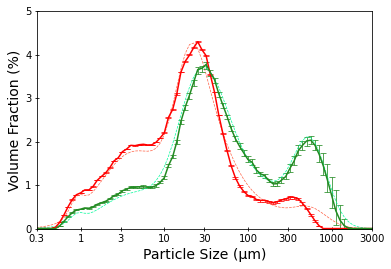

In [7]:
####################
### Figure S18 B ###
####################

plt.figure()
plt.errorbar(df_mes_err.iloc[:,0], df_mes_err.iloc[:,7],
             yerr = [df_mes_err.iloc[:,8], df_mes_err.iloc[:,9]],
             xerr = None,
             capsize = 3, c = "red", ecolor = 'red', elinewidth = 0.75, capthick = 0.75)
    
plt.plot(df_modal.iloc[:,0], df_modal.iloc[:,2],
         linestyle = '--', color = 'tomato', linewidth = 0.7) #(0, (10, 12)) mediumspringgreen

plt.errorbar(df_mes_err.iloc[:,0], df_mes_err.iloc[:,10],
             yerr = [df_mes_err.iloc[:,11], df_mes_err.iloc[:,12]],
             xerr = None,
             capsize = 3, c = "forestgreen", ecolor = 'forestgreen', elinewidth = 0.75, capthick = 0.75)
    
plt.plot(df_modal.iloc[:,0], df_modal.iloc[:,3],
         linestyle = '--', color = 'mediumspringgreen', linewidth = 0.7) #(0, (10, 12)) mediumspringgreen

plt.xscale('log')

plt.xlim(0.3, 700)
a = [0.3, 1, 3, 10, 30, 100, 300, 1000, 3000]
plt.xticks(ticks = a, labels = a)
plt.minorticks_off()
plt.xlabel('Particle Size (µm)', size = 14)

plt.ylim(0, 5)
plt.yticks(np.arange(0, 6, step=1))
plt.ylabel('Volume Fraction (%)', size = 14)

plt.tick_params(axis = 'both', direction = 'inout')
plt.savefig(r'FigureS18_ash.jpg', format = 'jpg', dpi = 1600, bbox_inches = 'tight')

End of code